In [4]:
# 1. Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# 2. Cargar dataset
!git clone https://github.com/esvs2202/Concrete-Compressive-Strength-Prediction.git

# Cargar CSV
data = pd.read_csv("Concrete-Compressive-Strength-Prediction/dataset/concrete_data.csv")

print("Dimensiones del dataset:", data.shape)
print("Columnas disponibles:", data.columns)
data.head()

fatal: destination path 'Concrete-Compressive-Strength-Prediction' already exists and is not an empty directory.
Dimensiones del dataset: (1030, 9)
Columnas disponibles: Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength'],
      dtype='object')


,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30



Descripción estadística:
            cement  blast_furnace_slag      fly_ash        water  \
count  1030.000000         1030.000000  1030.000000  1030.000000   
mean    281.167864           73.895825    54.188350   181.567282   
std     104.506364           86.279342    63.997004    21.354219   
min     102.000000            0.000000     0.000000   121.800000   
25%     192.375000            0.000000     0.000000   164.900000   
50%     272.900000           22.000000     0.000000   185.000000   
75%     350.000000          142.950000   118.300000   192.000000   
max     540.000000          359.400000   200.100000   247.000000   

       superplasticizer  coarse_aggregate  fine_aggregate           age  \
count       1030.000000       1030.000000      1030.000000  1030.000000   
mean           6.204660        972.918932       773.580485    45.662136   
std            5.973841         77.753954        80.175980    63.169912   
min            0.000000        801.000000       594.000000   

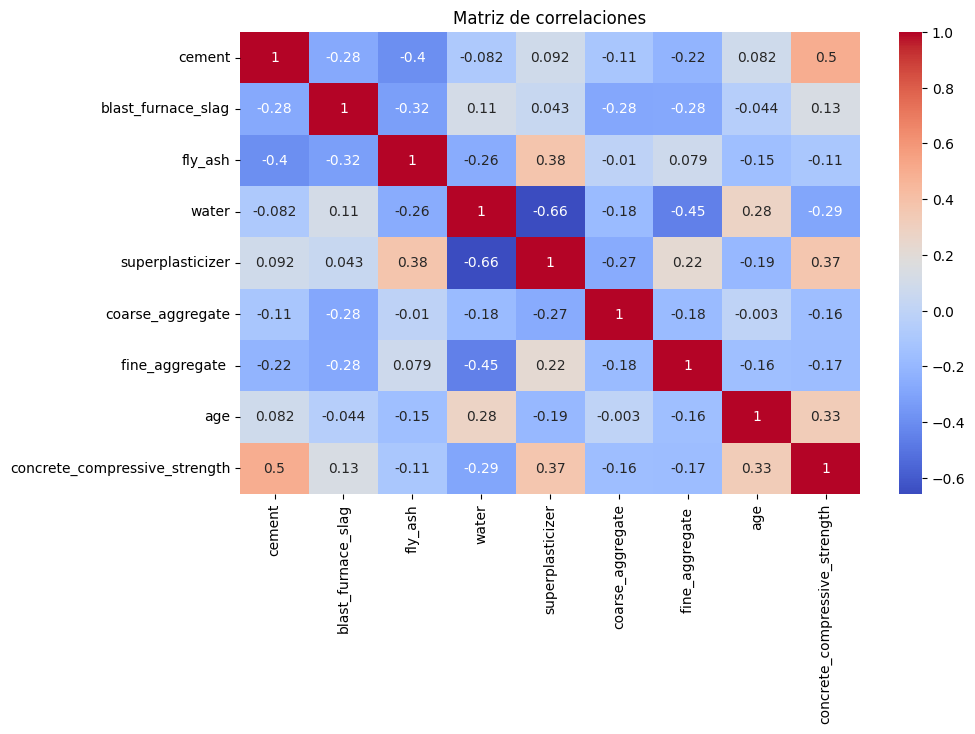

In [6]:
# 3. Exploración de datos
print("\nDescripción estadística:")
print(df.describe())

# Correlaciones
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de correlaciones")
plt.show()

In [7]:
# 4. Variables de interés
X = df[["cement"]]   # variable explicativa
y = df["concrete_compressive_strength"]  # variable objetivo

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


--- Algoritmo: KMeans ---


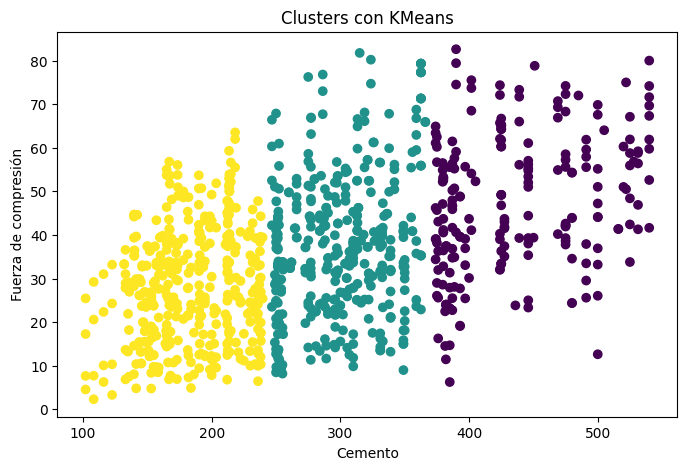


--- Algoritmo: DBSCAN ---


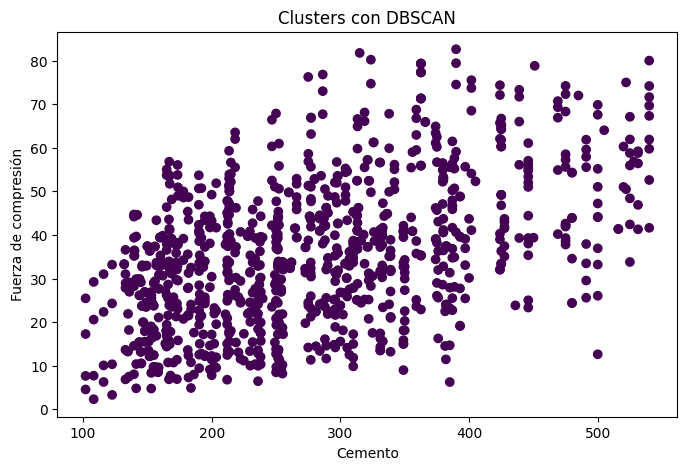


--- Algoritmo: Agglomerative Clustering ---


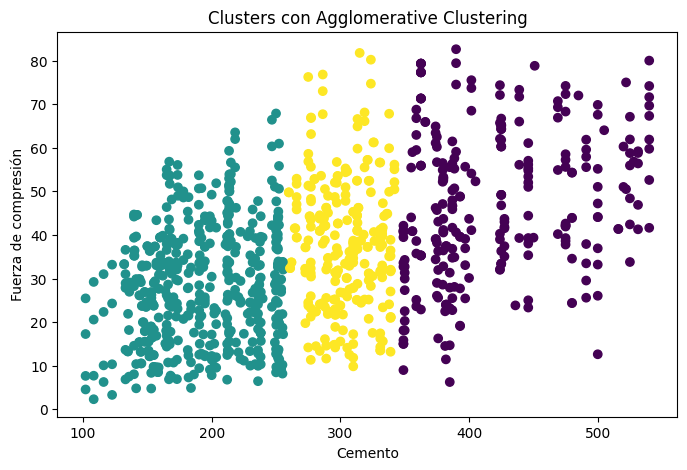

In [8]:
# 5. Clustering
# --- KMeans ---
print("\n--- Algoritmo: KMeans ---")
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_scaled)
df["cluster_kmeans"] = clusters_kmeans

plt.figure(figsize=(8,5))
plt.scatter(df["cement"], y, c=clusters_kmeans, cmap="viridis")
plt.xlabel("Cemento")
plt.ylabel("Fuerza de compresión")
plt.title("Clusters con KMeans")
plt.show()

# --- DBSCAN ---
print("\n--- Algoritmo: DBSCAN ---")
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters_dbscan = dbscan.fit_predict(X_scaled)
df["cluster_dbscan"] = clusters_dbscan

plt.figure(figsize=(8,5))
plt.scatter(df["cement"], y, c=clusters_dbscan, cmap="viridis")
plt.xlabel("Cemento")
plt.ylabel("Fuerza de compresión")
plt.title("Clusters con DBSCAN")
plt.show()

# --- Agglomerative Clustering ---
print("\n--- Algoritmo: Agglomerative Clustering ---")
agg = AgglomerativeClustering(n_clusters=3)
clusters_agg = agg.fit_predict(X_scaled)
df["cluster_agglomerative"] = clusters_agg

plt.figure(figsize=(8,5))
plt.scatter(df["cement"], y, c=clusters_agg, cmap="viridis")
plt.xlabel("Cemento")
plt.ylabel("Fuerza de compresión")
plt.title("Clusters con Agglomerative Clustering")
plt.show()